 # <div align="center">Logistic Regression</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

If you recall Linear Regression, it is used to determine the value of a continuous dependent variable. Logistic Regression is generally used for classification purposes. Unlike Linear Regression, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only two it is called **Binary Logistic Regression.**  
  
Let’s look at how logistic regression can be used for classification tasks.  
  
In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1. **If we take the weighted sum of inputs as the output as we do in Linear Regression, the value can be more than 1 but we want a value between 0 and 1. That’s why Linear Regression can’t be used for classification tasks.**  
  
We can see from the below figure that the output of the linear regression is passed through an activation function that can map any real value between 0 and 1.  
<img src="pics/1.png" />  
The activation function that is used is known as the sigmoid function. The plot of the sigmoid function looks like  
<img src="pics/2.png" />  
We can see that the value of the sigmoid function always lies between 0 and 1. The value is exactly 0.5 at X=0. We can use 0.5 as the probability threshold to determine the classes. If the probability is greater than 0.5, we classify it as Class-1(Y=1) or else as Class-0(Y=0).

Before we build our model let’s look at the assumptions made by Logistic Regression
1. The dependent variable must be categorical
2. The independent variables(features) must be independent (to avoid multicollinearity).

## <div align="center">Hypothesis and Cost Function</div>
---------------------------------------------------------------------
Till now we have understood how Logistic Regression can be used to classify the instances into different classes. In this section, we will define the hypothesis and the cost function.  
  
A Linear Regression model can be represented by the equation.  
<img src="pics/3.png" />  
We then apply the sigmoid function to the output of the linear regression  
<img src="pics/4.png" />  
where the sigmoid function is represented by,  
<img src="pics/5.png" />  
The hypothesis for logistic regression then becomes,  
<img src="pics/6.png" />  
<img src="pics/7.png" />  
If the weighted sum of inputs is greater than zero, the predicted class is 1 and vice-versa. So the decision boundary separating both the classes can be found by setting the weighted sum of inputs to 0.

### <div align="center">Cost Function</div>
---------------------------------------------------------------------
Like Linear Regression, we will define a cost function for our model and the objective will be to minimize the cost.  
  
The cost function for a single training example can be given by:  
<img src="pics/8.png" />  

### <div align="center">Cost function intuition</div>
---------------------------------------------------------------------
If the actual class is 1 and the model predicts 0, we should highly penalize it and vice-versa. As you can see from the below picture, for the plot -log(h(x)) as h(x) approaches 1, the cost is 0 and as h(x) nears 0, the cost is infinity(that is we penalize the model heavily). Similarly for the plot -log(1-h(x)) when the actual value is 0 and the model predicts 0, the cost is 0 and the cost becomes infinity as h(x) approaches 1.  
<img src="pics/9.png" />  
We can combine both of the equations using:  
<img src="pics/10.png" />  
The cost for all the training examples denoted by J(θ) can be computed by taking the average over the cost of all the training samples  
<img src="pics/11.png" />  
where m is the number of training samples.

We will use gradient descent to minimize the cost function. The gradient w.r.t any parameter can be given by  
<img src="pics/12.png" />  
The equation is similar to what we achieved in Linear Regression, only h(x) is different in both the cases.

## <div align="center">Training the model</div>
---------------------------------------------------------------------
Now we have everything in place we need to build our model. Let’s implement this in code.  
  
  
Let’s first prepare the data for our model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/marks.txt", header=None)

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

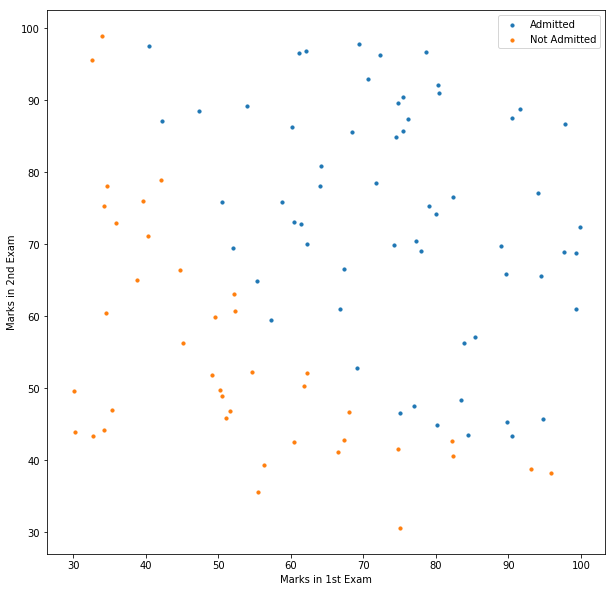

In [5]:
plt.figure(figsize=(10,10))

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [6]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [7]:
print(X[0:5])
print(y[0:5])
print(theta)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[[0]
 [0]
 [0]
 [1]
 [1]]
[[0.]
 [0.]
 [0.]]


We will define some functions that will be used to compute the cost.

In [8]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

Next, we define the cost and the gradient function.

In [9]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

Let’s also define the fit function which will be used to find the model parameters that minimizes the cost function. In this blog, we coded the gradient descent approach to compute the model parameters. Here, we will use **fmin_tnc** function from the scipy library. It can be used to compute the minimum for any function. It takes arguments as
1. func: the function to minimize
2. x0: initial values for the parameters that we want to find
3. fprime: gradient for the function defined by ‘func’
4. args: arguments that needs to be passed to the functions.

In [10]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)

The model parameters are [-25.16131856 0.20623159 0.20147149]

To see how good our model performed, we will plot the decision boundary.

## <div align="center">Plotting the decision boundary</div>
---------------------------------------------------------------------
As there are two features in our dataset, the linear equation can be represented by,  
<img src="pics/13.png" />  
As discussed earlier, the decision boundary can be found by setting the weighted sum of inputs to 0. Equating h(x) to 0 gives us,  
<img src="pics/14.png" />  
We will plot our decision boundary on top of the plot we used for visualizing our dataset.

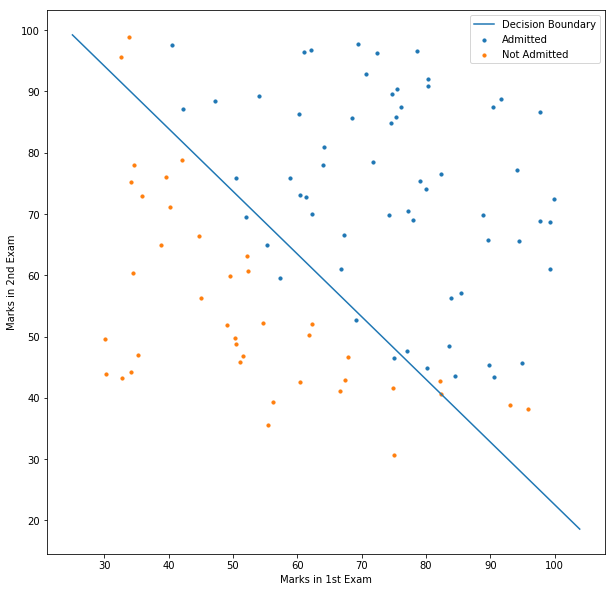

In [11]:
plt.figure(figsize=(10,10))
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

Looks that our model has done a decent job in predicting the classes. But how accurate is it? Let’s find out.

## <div align="center">Accuracy of the model</div>
---------------------------------------------------------------------

In [12]:
def predict( x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y.flatten())

89.0

The accuracy of the model is 89%.  
Let’s implement our classifier using scikit-learn and compare it with the model we built from scratch.

## <div align="center">scikit-learn implementation</div>
---------------------------------------------------------------------

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

The model parameters are [[-2.85831439, 0.05214733, 0.04531467]] and the accuracy is 91%.  
  
  
Why are the model parameters significantly different from the model we implemented from scratch? If you look at the documentation of sk-learn’s Logistic Regression implementation, it takes regularization into account. Basically, regularization is used to prevent the model from overfitting the data. I won’t be getting into the details of regularization in this blog. But for now, that’s it. Thanks for Reading !!